# **Quatrième partie du TP kNN et arbres**

Version du 10/08/2025

Jeu de données Census Income Dataset.
Il s'agit de déterminer à partir de données socio professionnelles si un ménage gagne plus de 50K par an ou non.

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

Après avoir importé les bibliothèques nécessaires, on charge la base de données dans le tableau (dataframe) *census_income*, puis on affiche la liste des variables.

In [2]:
# fetch dataset
census_income = fetch_ucirepo(id=20)
# data (as pandas dataframes)
x = census_income.data.features
y = census_income.data.targets
# metadata
print(census_income.metadata)
# variable information
print(census_income.variables)

{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Sep 09 2024', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

Résumé de la base et quelques statistiques descriptives.

In [3]:
col_names = ['Age','Workclass','fnlwgt','Education','Education-num','Marital_Status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','hrs_per_week','Native-Country','Earning_potential']
x.describe

<bound method NDFrame.describe of        age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2                Divorced  Handlers-cleaners   Not-in-family   
3      Married-civ-spouse  Handlers-cleaners         Husband   
4      Married-civ-spouse     Prof-specialty            Wife   
...                   ...                ...             ...   
48837            Divorced     Prof-specialty   Not-in-family   
48838             Widowed                NaN  Other-relative   
48839  Married-civ-spouse     Prof-specialty         Husband   
48840            Divorced       Adm-clerical       Own-child   
48841  Married-civ-spouse    Exec-managerial         Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
0                   White    Male          2174             0              40   
1                   White    Male             0             0              13   
2                   White    Male             0             0              40   
3                   Black    Male             0             0              40   
4                   Black  Female             0             0              40   
...                   ...     ...           ...           ...             ...   
48837               White  Female             0             0              36   
48838               Black    Male             0             0              40   
48839               White    Male             0             0              50   
48840  Asian-Pac-Islander    Male          5455             0              40   
48841               White    Male             0             0              60   

      native-country  
0      United-States  
1      United-States  
2      United-States  
3      United-States  
4               Cuba  
...              ...  
48837  United-States  
48838  United-States  
48839  United-States  
48840  United-States  
48841  United-States  

[48842 rows x 14 columns]>

In [4]:
x.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1             0             0              13  United-States  
2             0             0              40  United-States  
3             0             0              40  United-States  
4             0             0              40           Cuba

In [5]:
x.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [6]:
all_features = list(x.columns)
print(all_features)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [7]:
print(y)

       income
0       <=50K
1       <=50K
2       <=50K
3       <=50K
4       <=50K
...       ...
48837  <=50K.
48838  <=50K.
48839  <=50K.
48840  <=50K.
48841   >50K.

[48842 rows x 1 columns]


Quelques vérifications sur le tableau de données...

In [8]:
type(x)
len(x)
len(y)

48842

Préparation des données (nettoyage, etc.).

In [9]:
x.isnull().sum()
x = x.replace(to_replace = '%?%', value = np.nan)
nan_values = x.columns[x.isnull().any()]
x[nan_values].isnull().sum()
for i in list(nan_values):
    x[i].fillna(x[i].mode().values[0],inplace=True)
x.isnull().sum()
len(x)

/tmp/ipython-input-3212853695.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x[i].fillna(x[i].mode().values[0],inplace=True)


48842

Il est nécessaire de transformer les variables catégorielles pour pouvoir appliquer les différents classifieurs.

In [10]:
categorical_features = x.select_dtypes(include=['object']).columns
numerical_features = x.select_dtypes(include=np.number).columns
le = preprocessing.LabelEncoder()
for i in categorical_features:
    x[i] = le.fit_transform(x[i])

On garde les 2/3 du jeu de données pour l'entrainement.

In [11]:
y = y['income'].str.strip() # enlève espaces en début/fin
y = y.str.replace('.', '', regex=False) # enlève les points
x_train=x.loc[0:32560]
x_test=x.loc[32561:48841]
y_train=y.loc[0:32560]
y_test=y.loc[32561:48841]
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(32561, 14) (32561,) (16281, 14) (16281,)


In [12]:
print("Train class:", np.unique(y_train))
print("Test class:", np.unique(y_test))

Train class: ['<=50K' '>50K']
Test class: ['<=50K' '>50K']


In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train.values.ravel())
knn_trainscore = knn.score(x_train, y_train)
knn_testscore = knn.score(x_test, y_test)
print("KNN Accuracy: ")
print("KNN Train Accuracy: ",knn_trainscore*100)
print("KNN Test Accuracy: ",knn_testscore*100)

KNN Accuracy: 
KNN Train Accuracy:  86.6619575565861
KNN Test Accuracy:  75.922854861495


En principe, il faut mettre les données à l'échelle avec $k$-NN ("scaler" = centrer et réduire).

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])
knn.fit(x_train, y_train.values.ravel())
knn_trainscore = knn.score(x_train, y_train)
knn_testscore = knn.score(x_test, y_test)
print("KNN Train Accuracy:", knn_trainscore*100)
print("KNN Test Accuracy:", knn_testscore*100)

KNN Train Accuracy: 89.8006817972421
KNN Test Accuracy: 82.05884159449666


On teste ensuite une régression logisitique sur les mêmes données, puis on compare les performances entre régression logistique, K-PPV et arbres de décisions.

In [15]:
# On définit un modèle de régression logistique avec un nombre d'itérations élevé pour
# éviter (peut-être) les problèmes de convergence.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
LogRP = Pipeline([
    ('scaler', StandardScaler()),
    ('log reg', LogisticRegression(max_iter=1000))
])

LogRP.fit(x_train, y_train.values.ravel())
lr_trainscore = LogRP.score(x_train, y_train)
lr_testscore = LogRP.score(x_test, y_test)
lr_pred = LogRP.predict(x_test)

print("Régression logistique : Accuracy: ")
print("RL Train Accuracy: ",lr_trainscore*100)
print("RL Test Accuracy: ",lr_testscore*100)

Régression logistique : Accuracy: 
RL Train Accuracy:  82.50667977027733
RL Test Accuracy:  82.46422209937964


In [16]:
from sklearn.metrics import accuracy_score
arbre = DecisionTreeClassifier(random_state=0)
# Entraînement
arbre.fit(x_train, y_train.values.ravel())
# Prédictions
y_pred_train = arbre.predict(x_train)
y_pred_test = arbre.predict(x_test)
# Scores
arbre_trainscore = accuracy_score(y_train, y_pred_train)
arbre_testscore = accuracy_score(y_test, y_pred_test)
print("Arbre : Train Accuracy:", arbre_trainscore * 100)
print("Arbre : Tree Test Accuracy:", arbre_testscore * 100)

Arbre : Train Accuracy: 99.99692884125182
Arbre : Tree Test Accuracy: 81.00239543025613


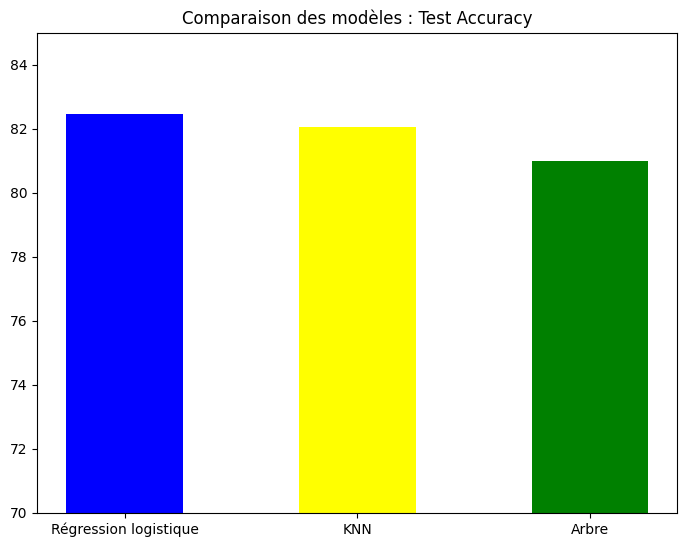

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparaison des modèles : Test Accuracy")
ax.set_ylim(70, 85)
label = ['Régression logistique', 'KNN', 'Arbre']
data = [lr_testscore*100, knn_testscore*100, arbre_testscore*100]
ax.bar(label,data, color = ['blue', 'yellow', 'green'], width = 0.5)
plt.show()

Interprétation :

- les trois modèles ont des résultats du même ordre de grandeur, cohérents avec ce que l'on trouve sur internet et dans la littérature.
- L'arbre de décision produit sans doute du sur-apprentissage et est un peu moins performant que les deux autres.
- $k$-NN est relativement lent sur ce jeu de données ($\sim 50\ 000$ individus).
- C'est la régression logistique qui donne les meilleurs résultats : le modèle est simple et rapide à entraîner. En plus il est interprétable.

Au final, ce qui nous intéresse vraiment n'est pas tellement la comparaison de ces performances, mais le fait de savoir quels sont les déterminants du fait de gagner plus ou moins de $50$ K$. Par ordre d'importance décroissante ce sont les suivants (le jeu de données est célèbre et ces résultats sont connus):

- La possession de capital (immobilier ou financier).
- Le niveau d'éducation.
- L'âge.
- Le sexe (le jeu date de 1994).
- Le nombre d'heures travaillées.
- Le statut marital (???) : marié >50K, célibataire < 50K.
- L'occupation.
- La profession (très surprenant qu'il soit aussi loin).

Pour voir apparaître ces déterminants, il faut effectuer la régression logistique et construire le tableau de significativité des coefficients.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
LogRP = Pipeline([
    ('scaler', StandardScaler()),
    ('log reg', LogisticRegression(max_iter=1000))
])
LogRP.fit(x_train, y_train.values.ravel())
lr_trainscore = LogRP.score(x_train, y_train)
lr_testscore = LogRP.score(x_test, y_test)
lr_pred = LogRP.predict(x_test)

scaler = LogRP.named_steps["scaler"]
LRM = LogRP.named_steps["log reg"]
feature_names = x_train.columns.tolist()

# Coefficients de la RL (binaire : 1 seule ligne)
coefs = LRM.coef_[0]
# Mettre dans un DataFrame pour trier proprement
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coefs,
    "abs_coef": np.abs(coefs)
})
# Trier par importance absolue décroissante
coef_df_sorted = coef_df.sort_values("abs_coef", ascending=False)
# Afficher les 20 plus importants
print(coef_df_sorted.head(20))
# Top 15 qui augmentent fortement la probabilité de >50K
print("\nTop 15 coefficients POSITIFS :")
print(coef_df.sort_values("coef", ascending=False).head(15))
# Top 15 qui diminuent fortement la probabilité de >50K
print("\nTop 15 coefficients NÉGATIFS :")
print(coef_df.sort_values("coef", ascending=True).head(15))

top10 = coef_df_sorted.head(10)
print("\nTop 10 des déterminants (en valeur absolue) :")
for _, row in top10.iterrows():
    direction = " revenu+ (>50K)" if row["coef"] > 0 else "revenu- (>50K)"
    print(f"{row['feature']:40s}  coef = {row['coef']:+.3f}   --> {direction}")

           feature      coef  abs_coef
10    capital-gain  2.323072  2.323072
4    education-num  0.852281  0.852281
0              age  0.464727  0.464727
9              sex  0.421507  0.421507
12  hours-per-week  0.368986  0.368986
5   marital-status -0.353025  0.353025
11    capital-loss  0.273544  0.273544
7     relationship -0.191171  0.191171
8             race  0.096230  0.096230
3        education  0.060954  0.060954
2           fnlwgt  0.053746  0.053746
6       occupation  0.044704  0.044704
1        workclass -0.031479  0.031479
13  native-country  0.026880  0.026880

Top 15 coefficients POSITIFS :
           feature      coef  abs_coef
10    capital-gain  2.323072  2.323072
4    education-num  0.852281  0.852281
0              age  0.464727  0.464727
9              sex  0.421507  0.421507
12  hours-per-week  0.368986  0.368986
11    capital-loss  0.273544  0.273544
8             race  0.096230  0.096230
3        education  0.060954  0.060954
2           fnlwgt  0.053746  0.